In [12]:
os.getcwd()

'C:\\Users\\Sakshi'

In [16]:
os.chdir("D:\\DataScienceLU\\statsexcercise")

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

In [20]:
dataset = pd.read_csv("House Price.csv")

In [21]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   Alley        91 non-null     object 
 4   MasVnrArea   1452 non-null   float64
 5   1stFlrSF     1460 non-null   int64  
 6   2ndFlrSF     1460 non-null   int64  
 7   GrLivArea    1460 non-null   int64  
 8   GarageType   1379 non-null   object 
 9   GarageArea   1460 non-null   int64  
 10  SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 125.6+ KB


In [22]:
dataset.head(5)

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000


In [27]:
dataset.isnull().sum()


Id                0
LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [32]:
from sklearn.impute import SimpleImpute

ImportError: cannot import name 'SimpleImpute' from 'sklearn.impute' (C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\impute\__init__.py)

In [36]:
dataset.drop(['Alley'], axis = 1,inplace = True)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   MasVnrArea   1452 non-null   float64
 4   1stFlrSF     1460 non-null   int64  
 5   2ndFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageType   1379 non-null   object 
 8   GarageArea   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 114.2+ KB


In [51]:
missing_lotfront = dataset.iloc[:,1].values

In [52]:
missing_lotfront

array([65., 80., 68., ..., 66., 68., 75.])

In [59]:
pd.DataFrame(missing_lotfront).isnull().sum()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1460 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   MasVnrArea   1452 non-null   float64
 4   1stFlrSF     1460 non-null   int64  
 5   2ndFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageType   1379 non-null   object 
 8   GarageArea   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 114.2+ KB


<AxesSubplot:ylabel='MasVnrArea'>

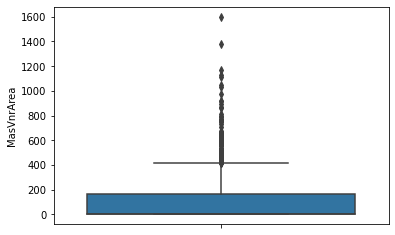

In [60]:
sns.boxplot(y='MasVnrArea',data = dataset)

In [61]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].median())


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1460 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   MasVnrArea   1460 non-null   float64
 4   1stFlrSF     1460 non-null   int64  
 5   2ndFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageType   1379 non-null   object 
 8   GarageArea   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 114.2+ KB


In [64]:
dataset.groupby('GarageType').size()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
dtype: int64

In [65]:
(1-(1379/1460))

0.05547945205479454

In [66]:
dataset['GarageType'] = dataset['GarageType'].fillna('Attchd')

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1460 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   MasVnrArea   1460 non-null   float64
 4   1stFlrSF     1460 non-null   int64  
 5   2ndFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageType   1460 non-null   object 
 8   GarageArea   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 114.2+ KB


In [91]:
x = dataset.iloc[:,0:9]
y = dataset.iloc[:,9]

In [94]:
x

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea
0,1,65.0,8450,196.0,856,854,1710,Attchd,548
1,2,80.0,9600,0.0,1262,0,1262,Attchd,460
2,3,68.0,11250,162.0,920,866,1786,Attchd,608
3,4,60.0,9550,0.0,961,756,1717,Detchd,642
4,5,84.0,14260,350.0,1145,1053,2198,Attchd,836
...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,Attchd,460
1456,1457,85.0,13175,119.0,2073,0,2073,Attchd,500
1457,1458,66.0,9042,0.0,1188,1152,2340,Attchd,252
1458,1459,68.0,9717,0.0,1078,0,1078,Attchd,240


In [95]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [97]:
x["GarageType"] = x["GarageType"].astype('category')
x['GarageType'] = x['GarageType'].cat.codes # encoding
x1 = pd.get_dummies(x, columns=['GarageType']) # one hot encoder

In [98]:
x1

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5
0,1,65.0,8450,196.0,856,854,1710,548,0,1,0,0,0,0
1,2,80.0,9600,0.0,1262,0,1262,460,0,1,0,0,0,0
2,3,68.0,11250,162.0,920,866,1786,608,0,1,0,0,0,0
3,4,60.0,9550,0.0,961,756,1717,642,0,0,0,0,0,1
4,5,84.0,14260,350.0,1145,1053,2198,836,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,460,0,1,0,0,0,0
1456,1457,85.0,13175,119.0,2073,0,2073,500,0,1,0,0,0,0
1457,1458,66.0,9042,0.0,1188,1152,2340,252,0,1,0,0,0,0
1458,1459,68.0,9717,0.0,1078,0,1078,240,0,1,0,0,0,0


In [100]:
x2 = x1.iloc[:,0:13]

In [101]:
x2 = 

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4
0,1,65.0,8450,196.0,856,854,1710,548,0,1,0,0,0
1,2,80.0,9600,0.0,1262,0,1262,460,0,1,0,0,0
2,3,68.0,11250,162.0,920,866,1786,608,0,1,0,0,0
3,4,60.0,9550,0.0,961,756,1717,642,0,0,0,0,0
4,5,84.0,14260,350.0,1145,1053,2198,836,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,953,694,1647,460,0,1,0,0,0
1456,1457,85.0,13175,119.0,2073,0,2073,500,0,1,0,0,0
1457,1458,66.0,9042,0.0,1188,1152,2340,252,0,1,0,0,0
1458,1459,68.0,9717,0.0,1078,0,1078,240,0,1,0,0,0


In [103]:
# split the data into training and test
from sklearn.model_selection import train_test_split 
# from sklearn.crass_validation import train_test_split # this is for jupyter version 2.7
x2_train, x2_test, y_train, y_test = train_test_split(x2, y) 
# in python, by default you will get split data into 75%:25% 
print(x2_train.shape)
print(x2_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 13)
(365, 13)
(1095,)
(365,)


In [104]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x2_train, y_train)

LinearRegression()

In [105]:
y_pred = regressor.predict(x2_test)

In [106]:
print(y_pred)
print(y_test)

[250851.23196226  87581.13931541 315465.01660281 186592.64294952
 238823.0432898  118581.93924387 186212.91591725 128283.86737076
 180565.93791576 366801.54746657 159498.09294222 128847.23741397
 187448.05864885 204362.34614896 110771.3014474  296543.65549733
  81185.89820004 201739.80548707 188571.18785188 129982.64309414
 307744.69873504 202646.70773084 248803.52073607 180131.86144532
  99806.75373148 160232.44113955 177417.41670062 205871.25998962
 134678.51668586 287841.48976669 148622.64815975 182585.26704374
 216200.07105368  78890.88423004 181219.90812956 144683.06411561
 264333.94516311 144146.39060235 179439.01457531 123103.62303875
 138622.42978888 213995.19406913 225825.91678319 227025.57254434
 222949.22753858 158378.09857275 254385.59712167 212293.43669277
 251267.07276349 323873.50475285 157263.18615448 256503.1739047
 119501.08130403 119790.27552214 148869.11579561 123009.82889443
 204712.40003399 109517.66142247 140919.97749988 316133.93638607
 130764.27285254  85934.76

In [107]:
regressor.intercept_

-13112.996416545182

In [108]:
regressor.coef_

array([-4.53738692e+00, -1.94650069e+02,  3.47454959e-01,  4.57986945e+01,
        8.28390019e+01,  5.11591008e+01,  8.25646260e+00,  1.19909688e+02,
       -7.33563353e+04,  2.72046553e+04, -3.49729330e+03,  4.25102812e+04,
       -4.89773215e+04])

In [109]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6987119679638172

In [110]:
#import statsmodels.formula.api as sm
import statsmodels.api as sm

In [112]:
regressor_ols = sm.OLS(endog = y_train, exog = x2_train).fit() 

In [113]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              1553.
Date:                Thu, 17 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:22:31   Log-Likelihood:                         -13280.
No. Observations:                1095   AIC:                                  2.659e+04
Df Residuals:                    1082   BIC:                                  2.665e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Id              -7.1480      3.029     -2.360      0.018     -13.092      -1.204
LotFrontage   -255.5813     63.994     -3.994      0.000    -381.147    -130.015
LotArea          0.3690      0.132      2.788      0.005       0.109       0.629
MasVnrArea      49.1452      8.485      5.792      0.000      32.497      65.793
1stFlrSF        80.0047     26.725      2.994      0.003      27.567     132.443
2ndFlrSF        50.3413     26.637      1.890      0.059      -1.925     102.608
GrLivArea        7.1968     25.917      0.278      0.781     -43.657      58.051
GarageArea     118.0076      7.763     15.200      0.000     102.775     133.241
GarageType_0 -7.385e+04   2.28e+04     -3.234      0.001   -1.19e+05    -2.9e+04
GarageType_1  2.608e+04   3323.862      7.847      0.000    1.96e+04    3.26e+04
GarageType_2 -3536.5973   1.11e+04     -0.320      0.749   -2.52e+04    1.82e+04
GarageType_3  4.253e+04   6760.537      6.292      0.000    2.93e+04    5.58e+04
GarageType_4 -5.084e+04   1.86e+04     -2.737      0.006   -8.73e+04   -1.44e+04
==============================================================================
Omnibus:                      289.076   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18535.589
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                      23.154   Cond. No.                     2.58e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""